In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv


### Import the Dataset.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv(filepath_or_buffer='/kaggle/input/air-passengers/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'], 
                             infer_datetime_format=True) 
df = df.set_index(['Month']) 
df.head() 

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Plot Time Series Data

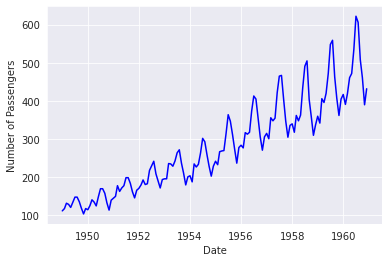

In [3]:
import matplotlib
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['font.size'] = 14
rcParams['figure.facecolor'] = '#000000'
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(df, color='blue')

### Determine Rolling Statistics

In [4]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

print(rolling_mean, rolling_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


### Plot Rolling Statistics

Text(0.5, 1.0, 'Rolling Statistics')

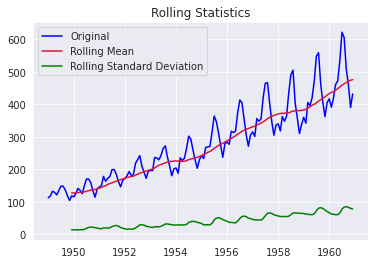

In [5]:
original_data = plt.plot(df, 
                         color='blue', 
                         label='Original')
mean = plt.plot(rolling_mean, 
                color='crimson', 
                label='Rolling Mean')
std = plt.plot(rolling_std, 
               color='green', 
               label='Rolling Standard Deviation')

plt.legend(loc='best')
plt.title('Rolling Statistics')

### Perform Dickey-Fuller Test

In [6]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], 
                     index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print('Results of Dickey-Fuller Test: ')
print(dfoutput)

Results of Dickey-Fuller Test: 
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### Estimate the Trend

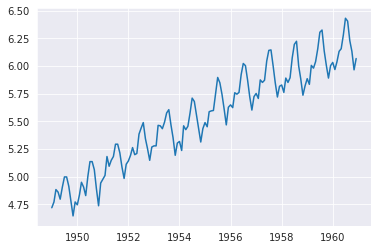

In [7]:
df_log_scale = np.log(df)
plt.plot(df_log_scale)

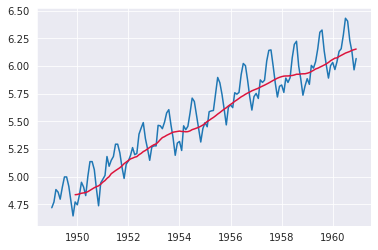

In [8]:
movingAverage = df_log_scale.rolling(window=12).mean()
movingStd = df_log_scale.rolling(window=12).std()

plt.plot(df_log_scale)
plt.plot(movingAverage, 
         color='crimson')

### Differencing
$ \begin{equation}y(t) = y(t)-y(t-1) \end{equation}$

In [9]:
dfLogScaleMinusMovingAverage = df_log_scale - movingAverage
dfLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [10]:
dfLogScaleMinusMovingAverage.dropna(inplace=True)
dfLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [11]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plotting rolling statistics
    original = plt.plot(timeseries, 
                        color='blue', 
                        label='Original')
    mean = plt.plot(movingAverage, 
                    color='crimson', 
                    label='Rolling Mean')
    std = plt.plot(movingSTD, 
                   color='green', 
                   label='Rolling Standard Deviation')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    dftest = adfuller(timeseries['#Passengers'], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print("Results of Dickey-Fuller Test: ")
    print(dfoutput)

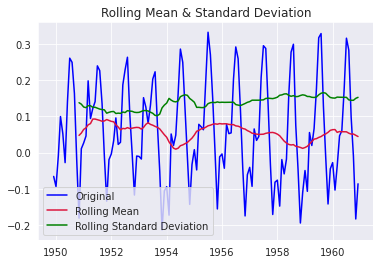

Results of Dickey-Fuller Test: 
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [12]:
test_stationarity(dfLogScaleMinusMovingAverage)